In [1]:
import numpy as np
import pandas as pd

#导入数据，地址根据文件地址更改
df = pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
#数据预处理
df.nunique().nsmallest(10)  # 无效列值检查
# EmployeeCount, Over18 and StandardHours 这些属性值完全相同
# 删除无效列值
df.drop(['StandardHours', 'EmployeeCount', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)
df.isnull().sum()  # 缺失值检查
df[df.duplicated()]  # 重复值检查
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [3]:
#中文编码为数字
from sklearn.preprocessing import LabelEncoder
#LabelEncoder对非数字格式列编码
dtypes_list=df.dtypes.values#取出各列的数据类型
columns__list=df.columns#取出各列列名
#循环遍历每一列找出非数字格式进行编码
for i in  range(len(columns__list)):
    if dtypes_list[i] == 'object':#判断类型
        lb=LabelEncoder() # 导入LabelEncoder模型
        lb.fit(df[columns__list[i]]) # 训练
        df[columns__list[i]] = lb.transform(df[columns__list[i]]) # 编码\
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


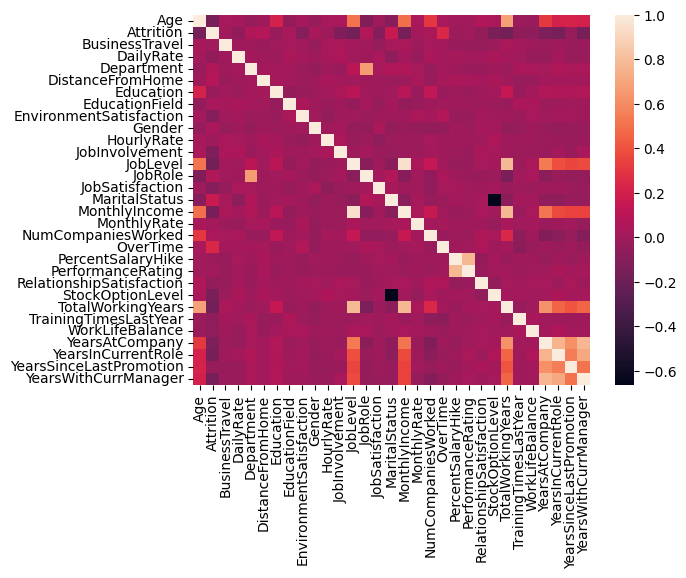

In [4]:

#查看各列相关性
import matplotlib.pyplot as plt
import seaborn as sns
corr=df.corr()
corr.head()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)
plt.show()

In [5]:
#黑色负相关,白色正相关
'''通过热力图下，可以看到 
MonthlyIncome 与 JobLevel 相关性较强；
TotalWorkingYears 与 JobLevel 相关性较强；
TotalWorkingYears 与 MonthlyIncome 相关性较强；
PercentSalaryHike 与 PerformanceRating 相关性较强；
YearsInCurrentRole 与 YearsAtCompany 相关性较强；
YearsWithCurrManager 与 YearsAtCompany 相关性较强；
StockOptionLevel与MaritalStatus成负相关，删除其中一列'''
df.drop(['JobLevel', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager',
                    'PercentSalaryHike', 'StockOptionLevel'],axis=1, inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,1,2,1102,2,1,2,1,2,0,...,5993,19479,8,1,3,1,0,1,6,0
1,49,0,1,279,1,8,1,1,3,1,...,5130,24907,1,0,4,4,3,3,10,1
2,37,1,2,1373,1,2,2,4,4,1,...,2090,2396,6,1,3,2,3,3,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,2909,23159,1,1,3,3,3,3,8,3
4,27,0,2,591,1,2,1,3,1,1,...,3468,16632,9,0,3,4,3,3,2,2


In [6]:
# 特征提取
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']

# 标准化数据
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
mean = np.mean(X, axis=0)
print('均值')
print(mean)
standard_deviation = np.std(X, axis=0)
print('标准差')
print(standard_deviation)

均值
[-3.50437744e-17 -6.04203007e-17  5.07530526e-17 -1.35341473e-16
  4.35026165e-17  7.00875488e-17  3.86689924e-17  1.30507849e-16
  4.35026165e-17  1.69176842e-16  6.52539247e-17 -2.41681203e-17
 -9.18388570e-17  1.30507849e-16 -4.47110225e-17  3.02101503e-17
  1.45008722e-17 -4.35026165e-17 -6.11453443e-16  9.66724811e-17
  8.70052330e-17 -6.04203007e-18 -3.02101503e-17  1.20840601e-18]
标准差
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [7]:
# 划分数据集
from sklearn.model_selection import train_test_split
#  此处填入你的代码。(1)
# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 检查划分后的数据集大小
print("训练集 X 的大小:", X_train.shape)
print("训练集 y 的大小:", y_train.shape)
print("测试集 X 的大小:", X_test.shape)
print("测试集 y 的大小:", y_test.shape)

训练集 X 的大小: (1102, 24)
训练集 y 的大小: (1102,)
测试集 X 的大小: (368, 24)
测试集 y 的大小: (368,)


In [8]:
X_train

array([[-0.86767181,  0.59004834, -0.5218156 , ...,  0.33809616,
        -0.65445374, -0.36871529],
       [-0.10115885,  0.59004834,  0.20208225, ...,  0.33809616,
        -0.98101416, -0.67914568],
       [-0.32016256,  0.59004834,  1.29784543, ...,  0.33809616,
         0.97834836,  0.25214551],
       ...,
       [-1.63418477, -0.91319439,  1.12430828, ...,  0.33809616,
        -1.14429437, -0.67914568],
       [-0.86767181,  0.59004834,  1.42675875, ...,  0.33809616,
        -0.49117353, -0.67914568],
       [ 1.43186707,  0.59004834, -1.33496114, ...,  0.33809616,
        -0.98101416, -0.67914568]])

In [9]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

# 默认
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

#  输出Accuracy Score。此处填入你的代码。(2)
print('Accuracy Score:', accuracy_score(y_test, y_pred))

Accuracy Score: 0.8858695652173914


In [10]:
#输出支持向量
print('支持向量:',np.matrix(svc.fit(X_train, y_train).support_vectors_))

支持向量: [[-0.86767181  0.59004834 -0.5218156  ...  0.33809616 -0.65445374
  -0.36871529]
 [-0.10115885  0.59004834  0.20208225 ...  0.33809616 -0.98101416
  -0.67914568]
 [-0.32016256  0.59004834  1.29784543 ...  0.33809616  0.97834836
   0.25214551]
 ...
 [-1.41518107  0.59004834  0.44999247 ... -2.49382042 -0.98101416
  -0.67914568]
 [ 1.76037262  0.59004834  0.90614728 ... -1.07786213 -0.81773395
  -0.05828489]
 [-1.63418477 -0.91319439  1.12430828 ...  0.33809616 -1.14429437
  -0.67914568]]


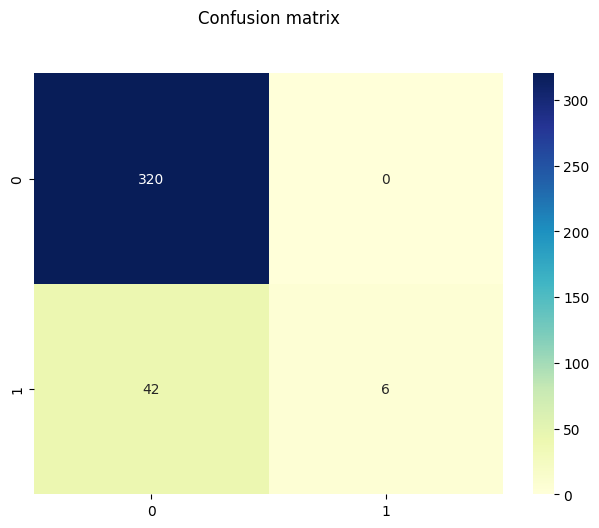

In [12]:
# 混淆矩阵
y_pred = svc.predict(X_test)
#  获取混淆矩阵。此处填入你的代码。(3)
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = [0, 1]  # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")

In [13]:
# 准确度、精确度和召回率
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
#  输出F1_score。此处填入你的代码。(4)
print("F1_score:", metrics.f1_score(y_test, y_pred))

Accuracy: 0.8858695652173914
Precision: 1.0
Recall: 0.125
F1_score: 0.2222222222222222


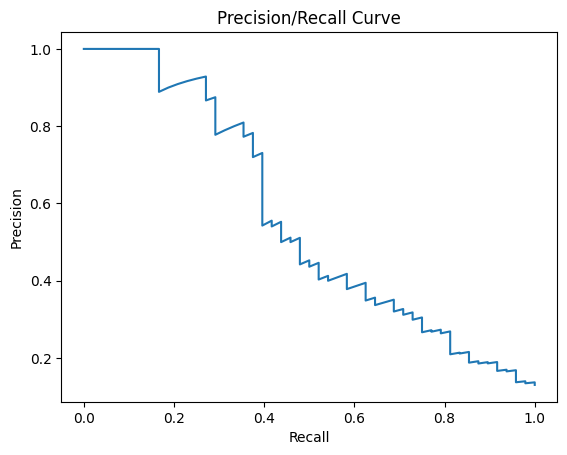

In [14]:
#PR曲线
from sklearn.metrics import precision_recall_curve
y_scores = svc.decision_function(X_test)
plt.figure("P-R Curve")
plt.title('Precision/Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
#y_test为样本实际的类别，y_scores为样本为正例的概率
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
#  绘制recall,precision曲线。此处填入你的代码。(5)
plt.plot(recall, precision)
plt.show()

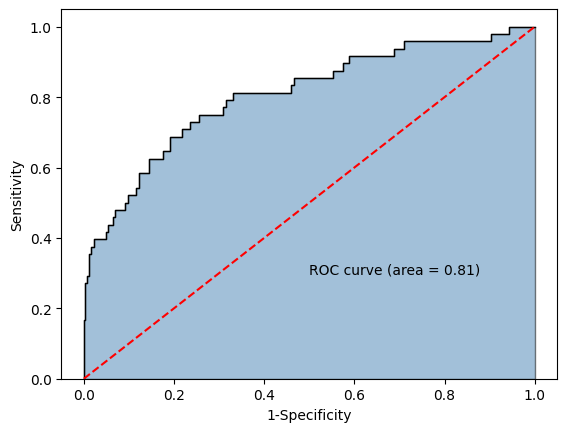

In [15]:
# 绘制ROC曲线
# 模型预测
# sklearn_predict = sklearn_logistic.predict(X_test)
# y得分为模型预测正例的概率
# y_score = sklearn_logistic.predict_proba(X_test)[:,1]

y_scores= svc.decision_function(X_test)

# 计算不同阈值下，fpr和tpr的组合值，其中fpr表示1-Specificity，tpr表示Sensitivity
fpr,tpr,threshold = metrics.roc_curve(y_test, y_scores)

# 计算AUC的值
roc_auc = metrics.auc(fpr,tpr)
# 绘制面积图
plt.stackplot(fpr, tpr, color='steelblue', alpha = 0.5, edgecolor = 'black')
# 添加边际线
plt.plot(fpr, tpr, color='black', lw = 1)
# 添加对角线
plt.plot([0,1],[0,1], color = 'red', linestyle = '--')
# 添加文本信息
plt.text(0.5,0.3,'ROC curve (area = %0.2f)' % roc_auc)
# 添加x轴与y轴标签
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
# 显示图形
plt.show()

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 加载数据集
data = pd.read_csv("letterdata.csv")

# 将数据集分为特征和标签
X = data.drop('letter', axis=1)
y = data['letter']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 创建一个SVM模型并训练
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# 使用测试集评估模型
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("准确率:", accuracy)

准确率: 0.8502


准确率: 0.8502
混淆矩阵:
 [[182   1   0   0   0   0   1   0   0   2   0   0   0   0   0   0   0   1
    1   0   1   1   0   0   1   0]
 [  1 165   0   4   1   0   0   5   1   0   0   0   0   1   0   1   0   5
    1   0   0   3   0   0   0   0]
 [  0   0 144   0   0   2   4   2   0   0   6   1   0   0   4   0   0   0
    0   0   2   0   0   0   0   0]
 [  0   8   0 184   0   0   0   2   0   1   1   0   0   3   2   0   0   1
    0   2   0   0   0   0   0   0]
 [  0   1   6   0 170   0   8   0   0   0   0   2   0   0   0   0   0   1
    4   2   0   0   0   0   0   1]
 [  0   0   1   0   2 154   2   1   2   2   0   0   0   2   0   1   0   0
    3   4   0   0   0   1   1   0]
 [  1   1  11   4   2   0 150   1   0   0   5   1   0   0   0   0   9   1
    4   0   0   4   1   0   0   0]
 [  1   4   1   9   1   2   1 110   0   2   6   0   0   2  11   1   3  16
    0   0   2   0   0   2   1   0]
 [  0   1   0   3   0   3   1   0 156  10   0   2   0   0   0   0   2   0
    3   0   0   0   0   4   0   2]


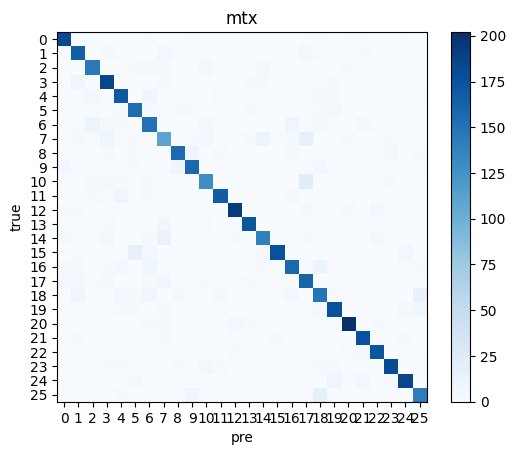

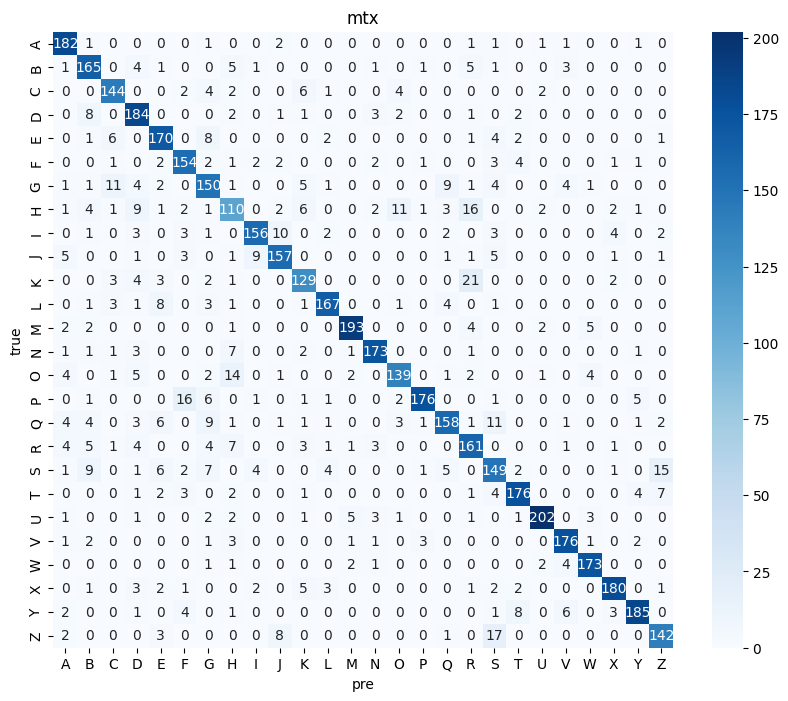

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt

# 加载数据集
data = pd.read_csv("letterdata.csv")

# 将数据集分为特征和标签
X = data.drop('letter', axis=1)
y = data['letter']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# 训练SVM模型
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# 预测测试集
y_pred = clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("准确率:", accuracy)

# 计算混淆矩阵
confusion_mtx = confusion_matrix(y_test, y_pred)
print("混淆矩阵:\n", confusion_mtx)

# 计算精确率和召回率
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print("精确率:", precision)
print("召回率:", recall)

import seaborn as sns

# 绘制混淆矩阵热图
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, cmap='Blues', annot=True, fmt='d')

# 添加标签和标题
plt.xticks(np.arange(0.5, 26.5), [chr(i) for i in range(65, 91)])
plt.yticks(np.arange(0.5, 26.5), [chr(i) for i in range(65, 91)])
plt.xlabel('pre')
plt.ylabel('true')
plt.title('mtx')

# 显示图形
plt.show()